In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

Exercise: _Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class._

In [4]:
X_sample, y_sample = mnist.data[:5000], mnist.target[:5000]

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'random', learning_rate = 'auto',
            random_state= 42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: user 2min 5s, sys: 630 ms, total: 2min 5s
Wall time: 18.4 s


## Plotting TSNE reduced data

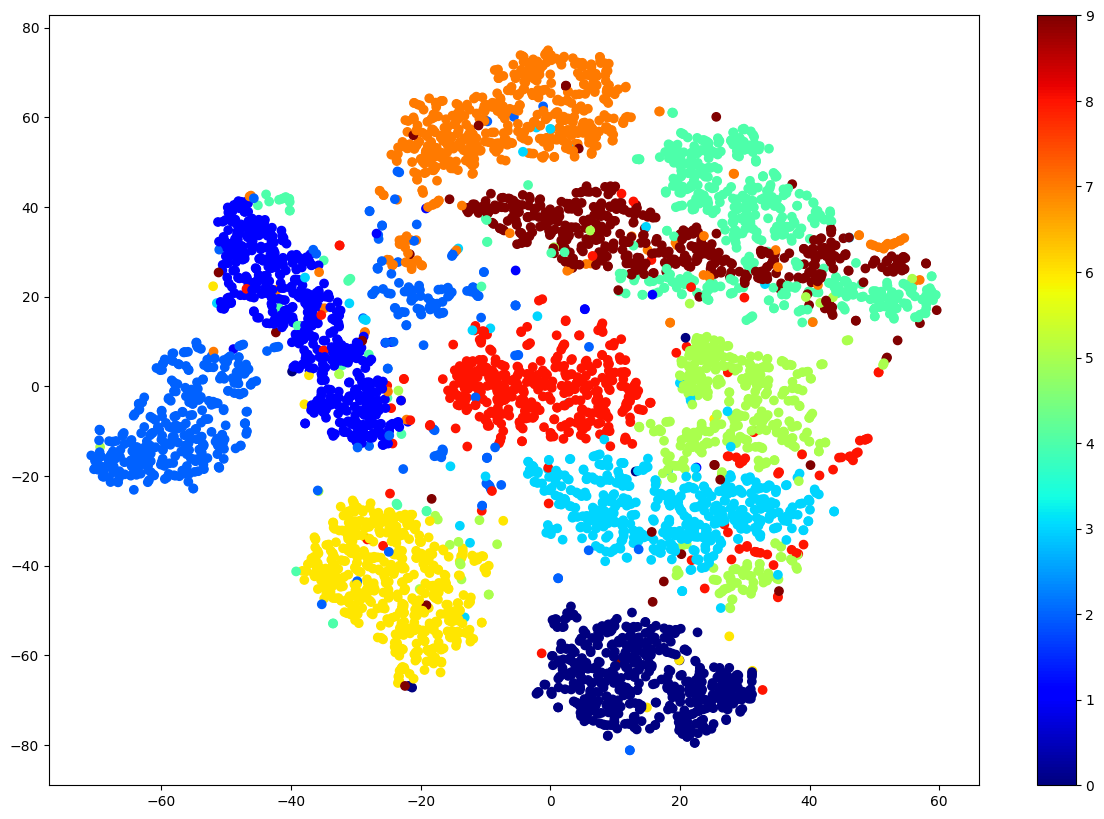

In [60]:
plt.figure(figsize=(15, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c = y_sample.astype(np.uint8), cmap='jet')
# plt.axis(False)
plt.colorbar()
plt.show()

As in handwriting 4 and 9 can be similar, so we can see an overlap in those cluster, same can be said for (3,5,8) and (1,2,7)

Focusing on (1, 2, 7)

In [13]:
y_sample.astype(np.uint8)

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

In [33]:
cmap = plt.cm.jet
cmap(1)

(0.0, 0.0, 0.517825311942959, 1.0)

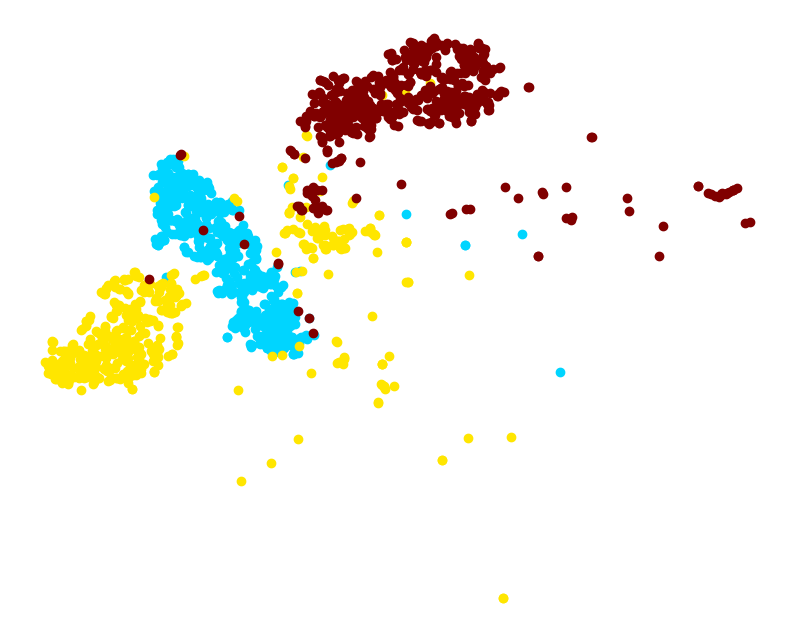

In [50]:
cmap = plt.cm.jet
plt.figure(figsize=(10, 8))
for digit in ('1', '2', '7'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1], c = [cmap(int(digit)/3)])
plt.axis(False)
plt.show()

Let's see if we can produce a nicer image by running t-SNE on just these 2 digits:

In [58]:
idx = (y_sample == '1') | (y_sample == '2') | (y_sample == '7')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

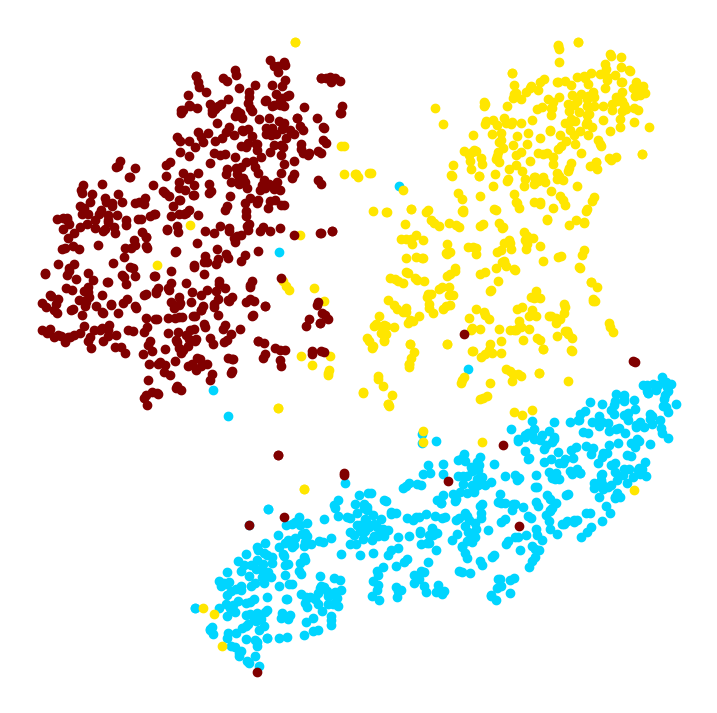

In [59]:
plt.figure(figsize=(9, 9))
for digit in ('1', '2', '7'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 3)])
plt.axis(False)
plt.show()

Exercise: _Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits._

In [89]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    plotted = np.array([[0., 0.]])
    
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.3)
    # plt.axis(False)
    ax = plt.gca()  # get current axes
    
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(plotted - image_coord, axis = 1).min()
        if closest_distance > min_distance:
            plotted = np.r_[plotted, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)
    
    plt.show()

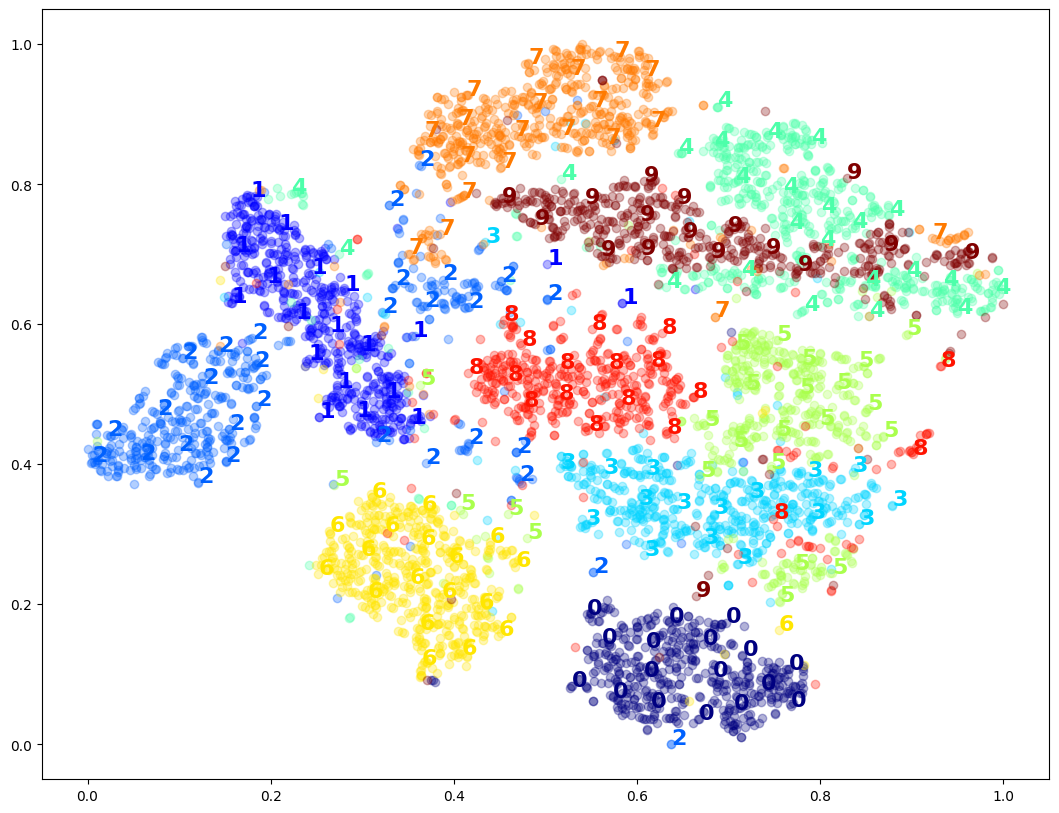

In [90]:
plot_digits(X_reduced, y_sample)

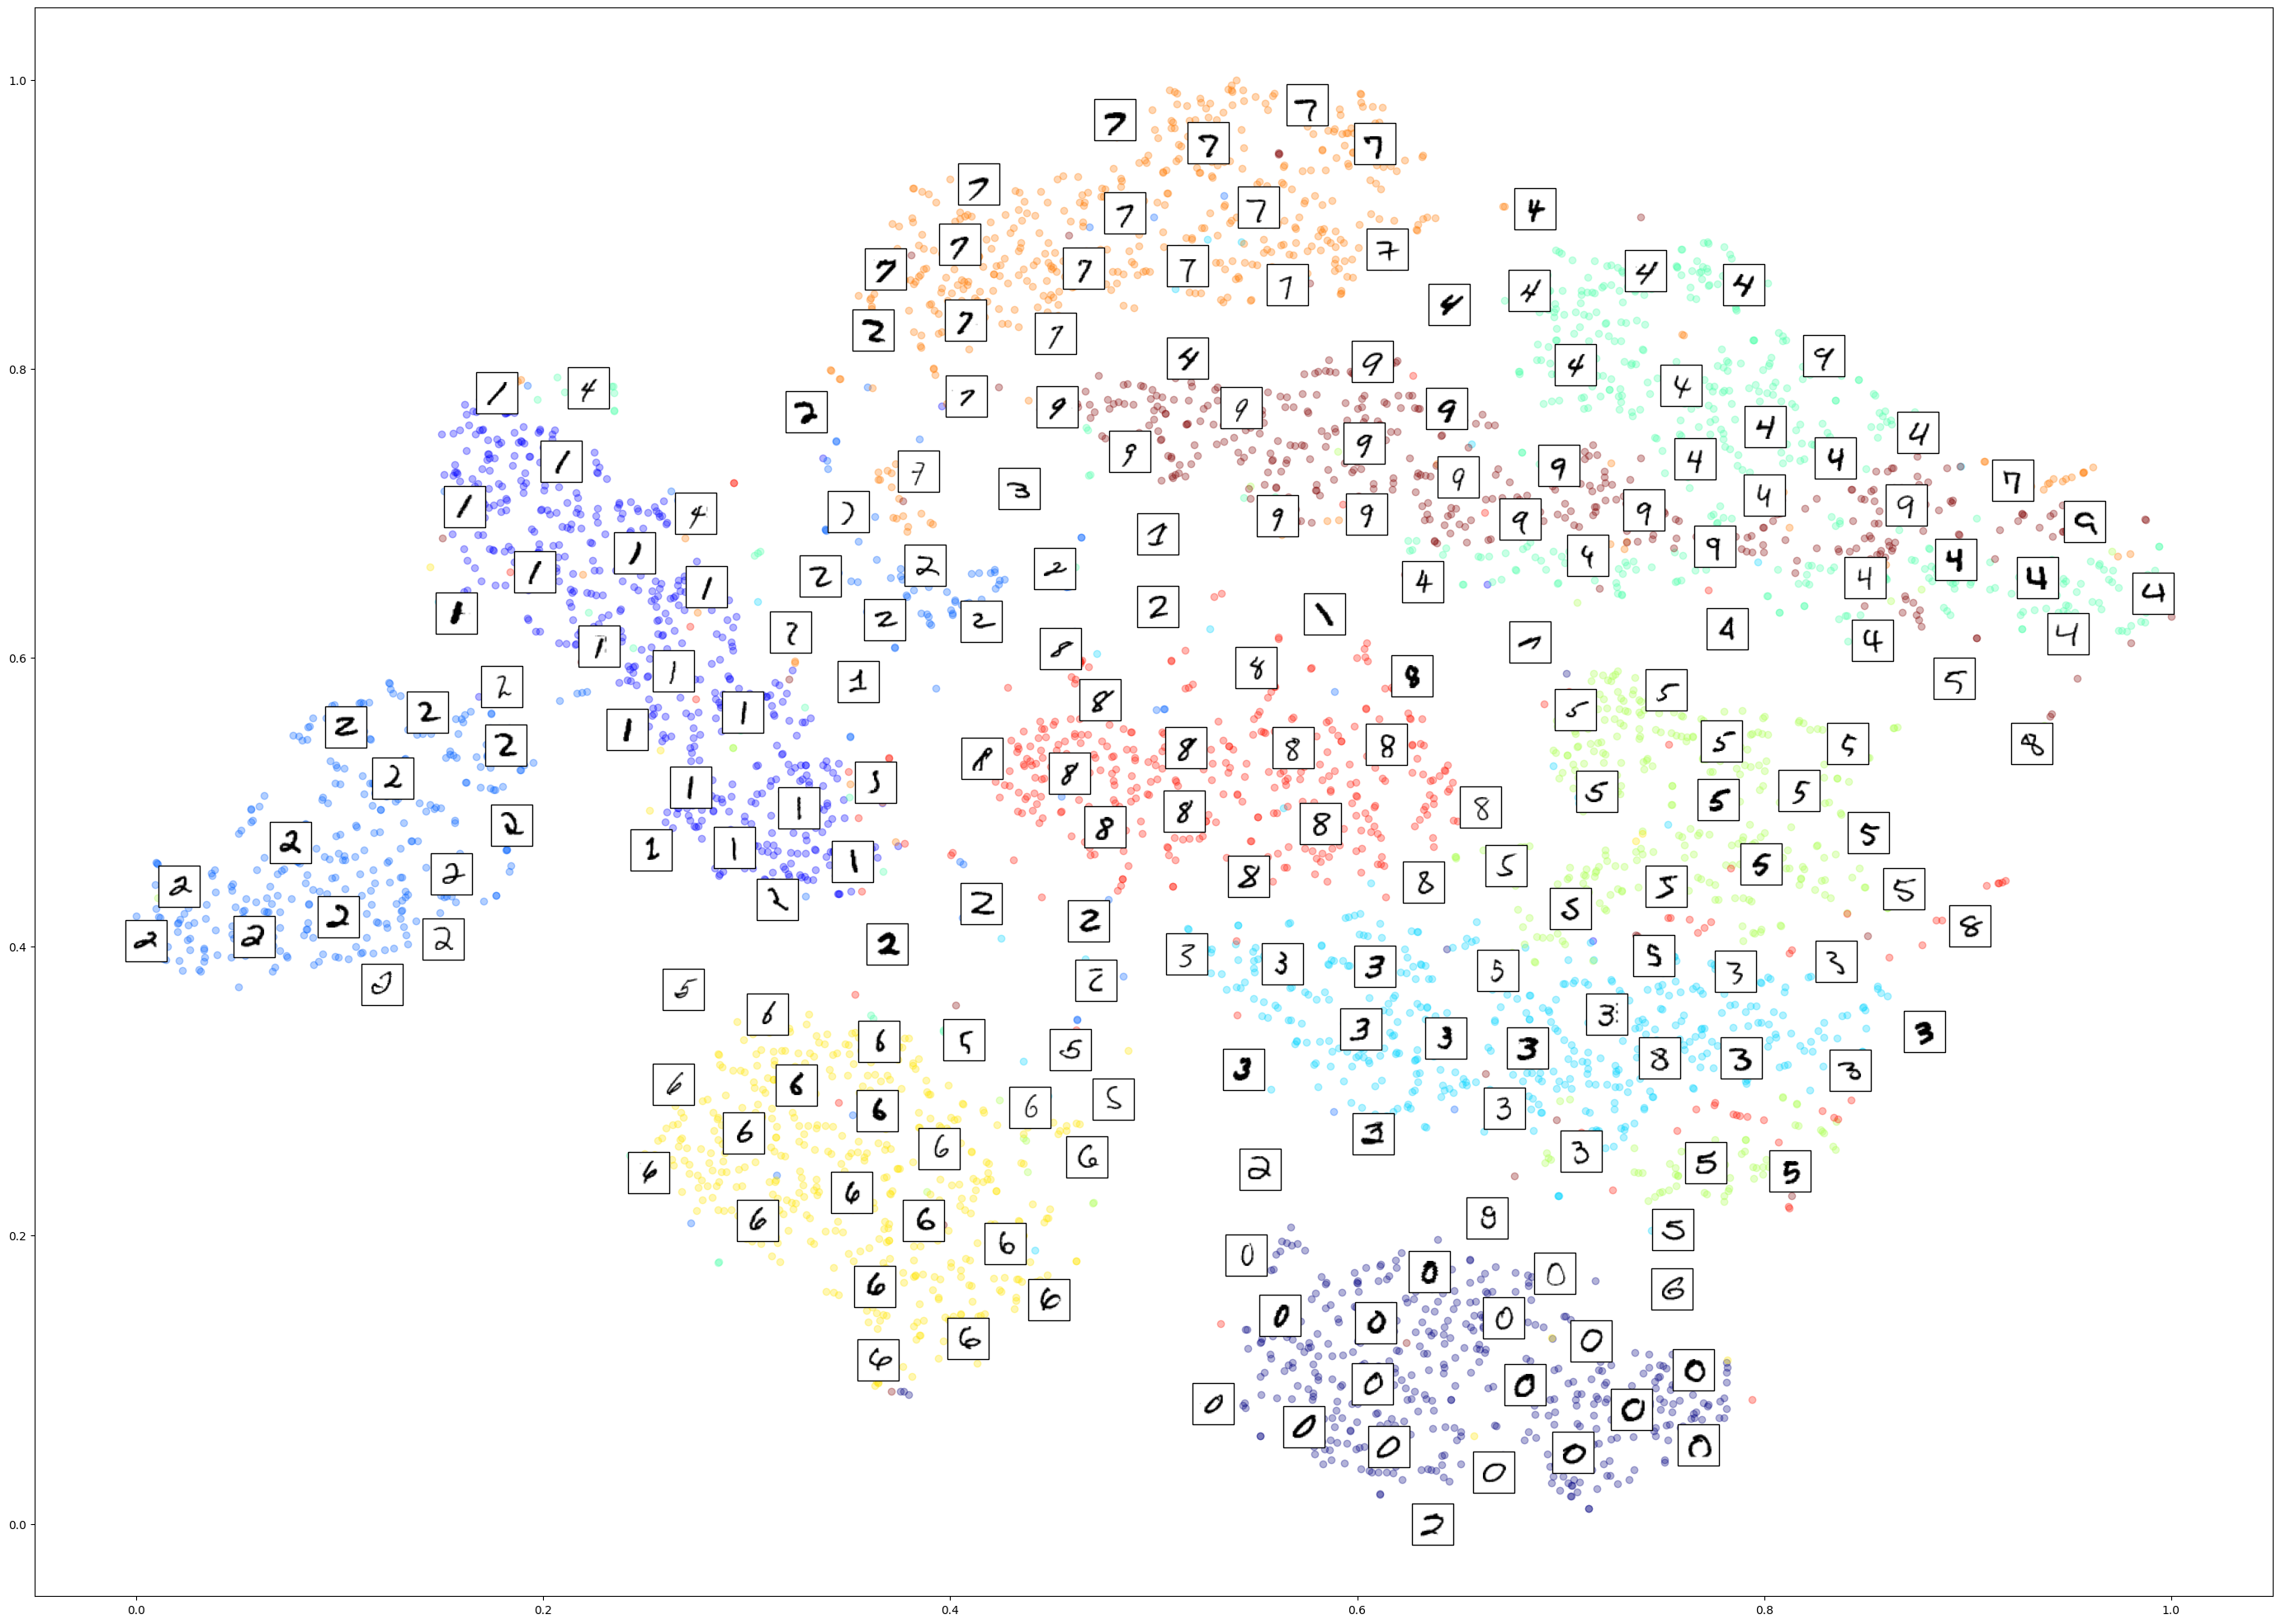

In [91]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25))

Focus on (1,2,7)

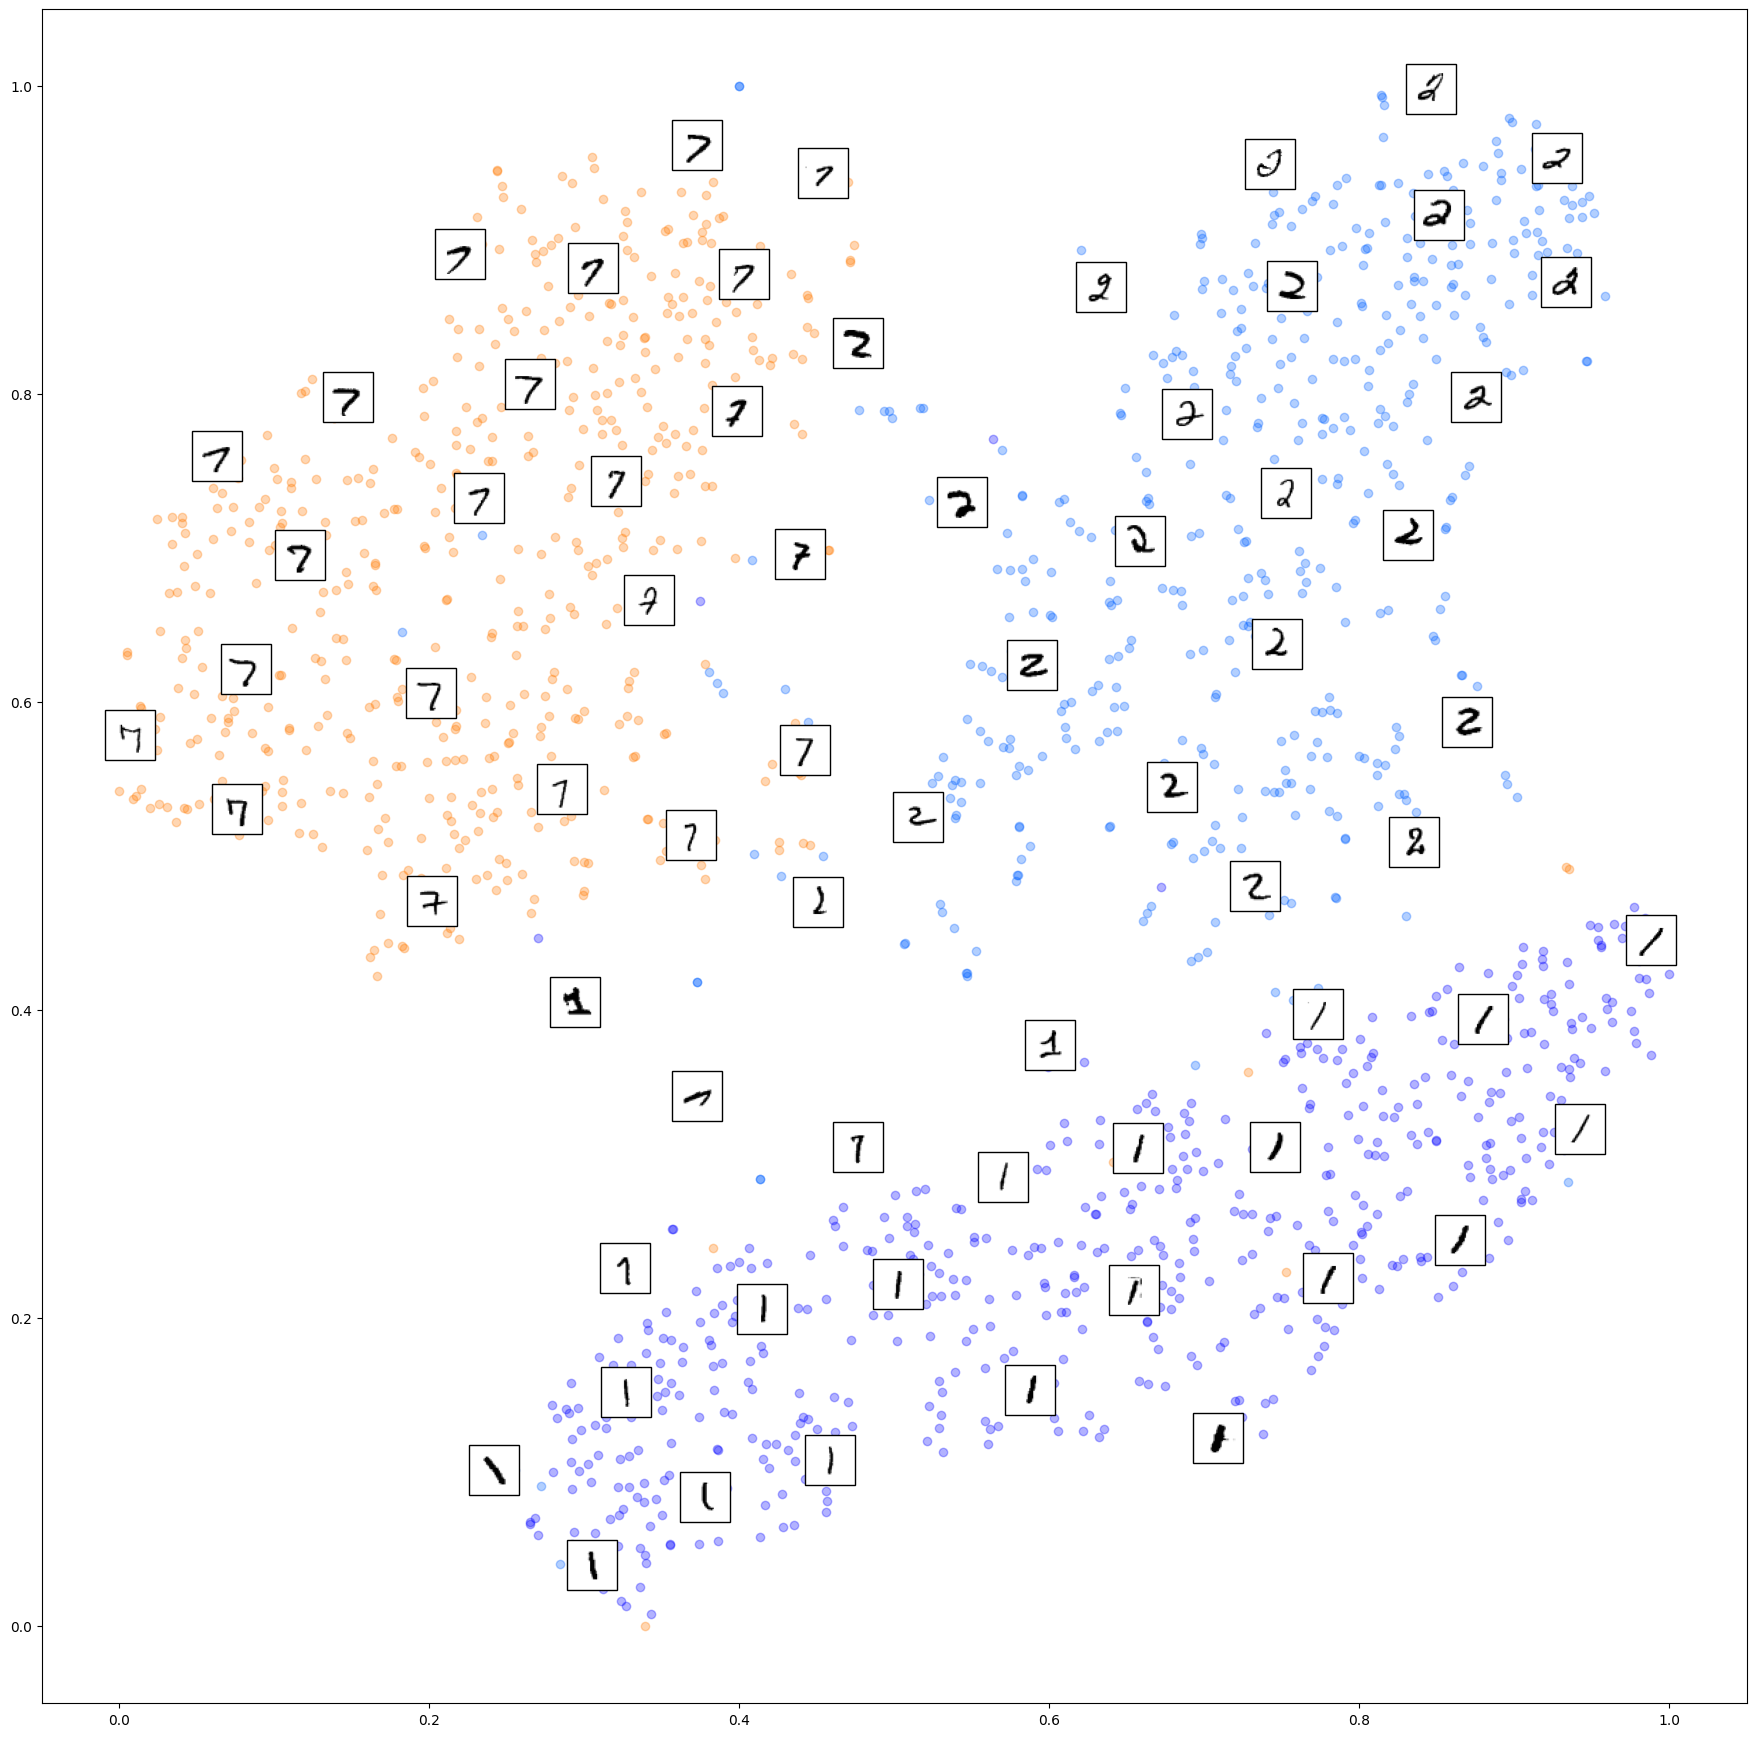

In [93]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, min_distance=0.08, figsize=(22, 22))